Importing the Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

Data Collection and Processing

In [17]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')

In [18]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [19]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [20]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [21]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [22]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [23]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [24]:
correlation = gold_data.corr()

<AxesSubplot:>

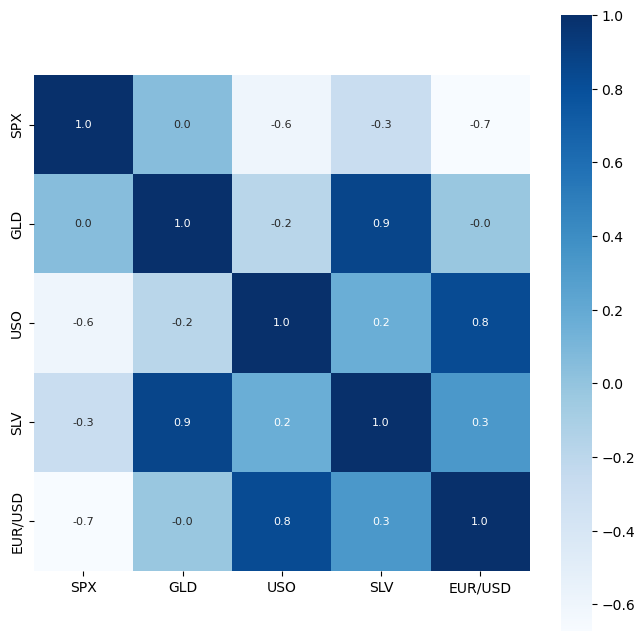

In [25]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [26]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


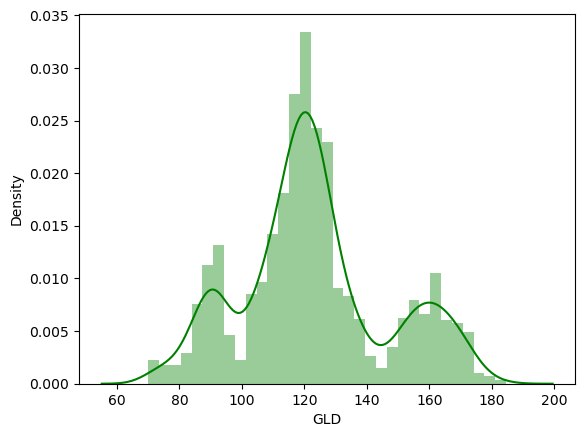

In [29]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green');

Splitting the Features and Target

In [30]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [31]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [32]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [34]:
regressor = RandomForestRegressor(n_estimators=100)

In [35]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [36]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [37]:
print(test_data_prediction)

[168.53209949  81.98299985 115.9898004  127.51020091 120.69920132
 154.63719818 150.20229941 126.1663004  117.55929866 125.90780067
 116.88620088 172.21770097 141.14439844 167.75449874 114.99459986
 117.63930035 139.40790282 170.15360096 159.63210303 158.04599892
 155.02519996 124.99640006 175.97069985 157.2807036  125.13660059
  93.86649944  77.37649996 120.45719993 119.07669921 167.41169966
  88.0945005  125.00510003  91.19640065 117.59500006 121.18049908
 136.09470127 115.48650136 115.25970071 146.33369994 107.11820107
 104.62540253  87.44359828 126.48950054 117.88830007 152.06239947
 119.7931     108.36339975 108.15269823  93.22030083 127.18679733
  74.94810033 113.69879962 120.93209981 111.35109924 118.77159899
 120.95209942 159.88540001 167.98970169 146.93099635  85.8657988
  94.58570028  86.85609904  90.43110025 118.97890062 126.46630058
 127.67980037 169.96639992 122.25599908 117.64899884  98.63110055
 168.20360082 143.13129783 132.25860225 121.03880257 121.1467992
 119.7167007

In [38]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.989270696359645


In [43]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(Y_test,test_data_prediction)
print('MSE=',MSE)

MSE= 5.659101471644236


In [44]:
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(Y_test,test_data_prediction)
print('MAE=',MAE)

MAE= 1.3146351410917043


In [45]:
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(Y_test,test_data_prediction,squared=False)
print('RMSE=',RMSE)

RMSE= 2.378886603359697


Compare the Actual Values and Predicted Values in a Plot

In [46]:
Y_test = list(Y_test)
Y_test

[168.020004,
 81.230003,
 112.32,
 127.589996,
 119.620003,
 154.210007,
 148.910004,
 126.190002,
 117.470001,
 125.739998,
 115.379997,
 167.119995,
 141.630005,
 169.559998,
 115.599998,
 119.669998,
 132.949997,
 170.399994,
 159.369995,
 173.529999,
 154.720001,
 128.119995,
 177.720001,
 157.190002,
 125.309998,
 93.400002,
 76.790001,
 119.690002,
 118.989998,
 167.389999,
 87.5,
 124.980003,
 91.230003,
 115.489998,
 120.949997,
 133.809998,
 116.690002,
 113.809998,
 133.580002,
 105.970001,
 105.120003,
 87.959999,
 126.82,
 116.860001,
 159.259995,
 119.459999,
 109.160004,
 108.620003,
 93.269997,
 127.160004,
 72.260002,
 113.470001,
 119.68,
 109.139999,
 119.309998,
 120.050003,
 159.889999,
 161.490005,
 146.740005,
 85.809998,
 93.709999,
 85.550003,
 91.029999,
 118.489998,
 126.449997,
 126.980003,
 171.699997,
 122.400002,
 116.410004,
 97.959999,
 169.630005,
 142.639999,
 131.809998,
 121.360001,
 124.0,
 119.699997,
 113.889999,
 118.919998,
 105.639999,
 127.669

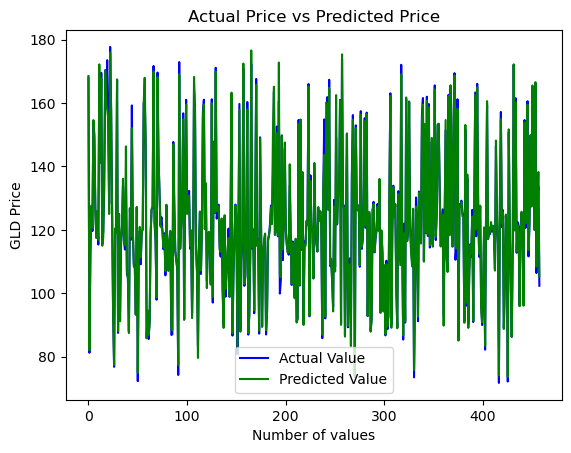

In [40]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()